In [1]:
!pip install matplotlib

Correlation of Proposed Model NMSE with previous value: -0.03
Correlation of ACRDNet1x NMSE with previous value: 1.00
Correlation of CRNet NMSE with previous value: 0.99
Correlation of BCsiNet NMSE with previous value: 0.98
Correlation of CsiNet NMSE with previous value: 0.99
Correlation of CsiNet+DNNet NMSE with previous value: 0.97
Correlation of CsiNetPlus NMSE with previous value: 0.99


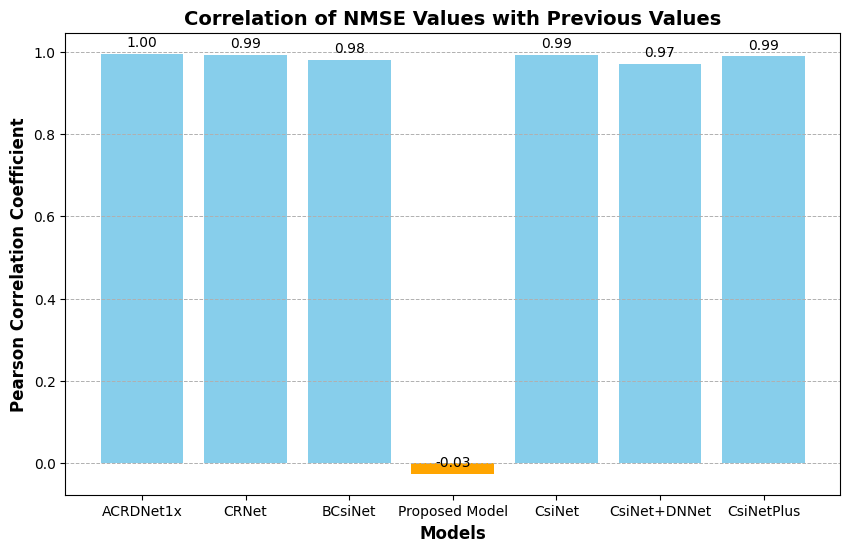

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Sample data
ypoints = np.array([15.87, 5.64, 0.60, -4.14, -8.47, -11.87, -13.90, -14.83, -15.17, -15.29])
ypoints1 = np.array([12.13, 6.93, 1.55, -3.87, -8.88, -12.64, -14.71, -15.57, -15.86, -15.96])
ypoints2 = np.array([8.46, 2.90, -3.41, -8.84, -11.32, -12.06, -12.28, -12.36, -12.38, -12.39])
ypoints3 = np.array([-11.55, -11.18, -11.91, -11.27, -9.89, -11.34, -11.60, -11.64, -11.25, -12.11])
ypoints4 = np.array([20, 16, 12.30, 7, 3, -2.5, -7.5, -10.10, -11, -12])
ypoints5 = np.array([4, -5.20, -8, -9.5, -10.2, -11.8, -12.2, -12.8, -12.9, -12.9])
ypoints6 = np.array([np.nan, 0, -5, -10, -14, -16, -16.8, -17.4, -17.5, np.nan])

# List of models including the proposed model
models = [
    ('ACRDNet1x', ypoints),
    ('CRNet', ypoints1),
    ('BCsiNet', ypoints2),
    ('Proposed Model', ypoints3),
    ('CsiNet', ypoints4),
    ('CsiNet+DNNet', ypoints5),
    ('CsiNetPlus', ypoints6),
]

# Calculate Pearson correlation coefficient for the proposed model (ypoints3) with its previous values
valid_indices = ~np.isnan(ypoints3)
valid_model_values = ypoints3[valid_indices]

# Previous values
previous_values = valid_model_values[:-1]
current_values = valid_model_values[1:]

if len(previous_values) > 1:
    corr_proposed_model, _ = pearsonr(previous_values, current_values)
    print(f'Correlation of Proposed Model NMSE with previous value: {corr_proposed_model:.2f}')
else:
    corr_proposed_model = np.nan
    print('Not enough data to calculate correlation for Proposed Model')

# Calculate Pearson correlation coefficients for other models
correlations = []
for model_name, model_values in models:
    if model_name == 'Proposed Model':
        correlations.append((model_name, corr_proposed_model))
        continue

    valid_indices = ~np.isnan(model_values)
    valid_model_values = model_values[valid_indices]

    # Previous values
    previous_values = valid_model_values[:-1]
    current_values = valid_model_values[1:]

    if len(previous_values) > 1:
        corr, _ = pearsonr(previous_values, current_values)
        correlations.append((model_name, corr))
        print(f'Correlation of {model_name} NMSE with previous value: {corr:.2f}')
    else:
        correlations.append((model_name, np.nan))
        print(f'Not enough data to calculate correlation for {model_name}')

# Prepare data for plotting
model_names = [model[0] for model in correlations]
corr_values = [model[1] for model in correlations]

# Plotting the correlation coefficients
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, corr_values, color=['skyblue' if model != 'Proposed Model' else 'orange' for model in model_names])

# Adding value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Adding axes labels and title
plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.ylabel('Pearson Correlation Coefficient', fontsize=12, fontweight='bold')
plt.title('Correlation of NMSE Values with Previous Values', fontsize=14, fontweight='bold')

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Save the plot as an image file (optional)
plt.savefig('nmse_previous_correlation.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


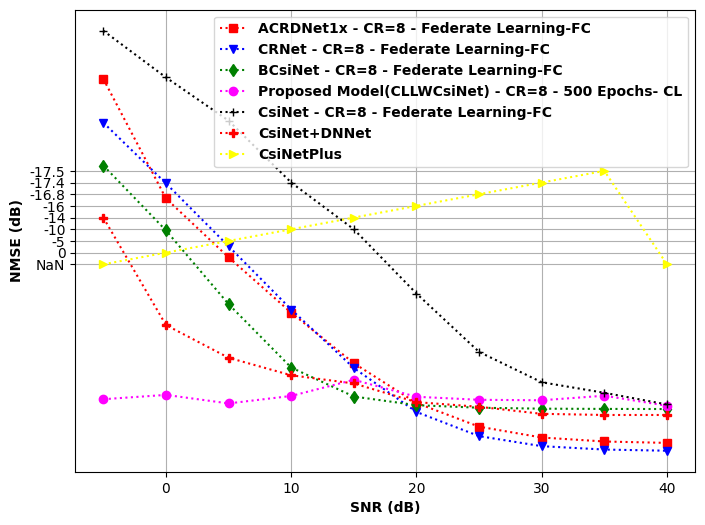

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
ypoints = np.array([15.87, 5.64, 0.60, -4.14, -8.47, -11.87, -13.90, -14.83, -15.17, -15.29])
ypoints1 = np.array([12.13, 6.93, 1.55, -3.87, -8.88, -12.64, -14.71, -15.57, -15.86, -15.96])
ypoints2 = np.array([8.46, 2.90, -3.41, -8.84, -11.32, -12.06, -12.28, -12.36, -12.38, -12.39])
ypoints3 = np.array([-11.55, -11.18, -11.91, -11.27, -9.89, -11.34, -11.60, -11.64, -11.25, -12.11])
ypoints4 = np.array([20, 16, 12.30, 7, 3, -2.5, -7.5, -10.10, -11, -12])
ypoints5 = np.array([4, -5.20, -8, -9.5, -10.2, -11.8, -12.2, -12.8, -12.9, -12.9])
ypoints6 = np.array(['NaN',0,-5,-10,-14,-16,-16.8,-17.4,-17.5,'NaN'])
xpoints = np.array([-5, 0, 5, 10, 15, 20, 25, 30, 35, 40])

# Plotting the figure
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.grid(True)

# Plotting data with specific markers, colors, and labels
plt.plot(xpoints, ypoints, color='red', marker='s', label='ACRDNet1x - CR=8 - Federate Learning-FC', linestyle='dotted')
plt.plot(xpoints, ypoints1, color='blue', marker='v', label='CRNet - CR=8 - Federate Learning-FC', linestyle='dotted')
plt.plot(xpoints, ypoints2, color='green', marker='d', label='BCsiNet - CR=8 - Federate Learning-FC', linestyle='dotted')
plt.plot(xpoints, ypoints3, color='magenta', marker='o', label='Proposed Model(CLLWCsiNet) - CR=8 - 500 Epochs- CL', linestyle='dotted')
plt.plot(xpoints, ypoints4, color='black', marker='+', label='CsiNet - CR=8 - Federate Learning-FC', linestyle='dotted')
plt.plot(xpoints, ypoints5, color='red', marker='P', label='CsiNet+DNNet', linestyle='dotted')
plt.plot(xpoints, ypoints6, color='yellow', marker='>', label='CsiNetPlus', linestyle='dotted')
# Adding axes labels and adjusting font size
plt.xlabel('SNR (dB)', fontsize=10, fontweight='bold')
plt.ylabel('NMSE (dB)', fontsize=10, fontweight='bold')

# Adjusting legend location and font size
font_properties = {
    'family': 'sans-serif',
    'weight': 'bold',
    'size': 10,
}
plt.legend(loc='upper right', prop=font_properties)

# Save the plot as an image file (optional)
plt.savefig('nmse_vs_noise_ieee.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()



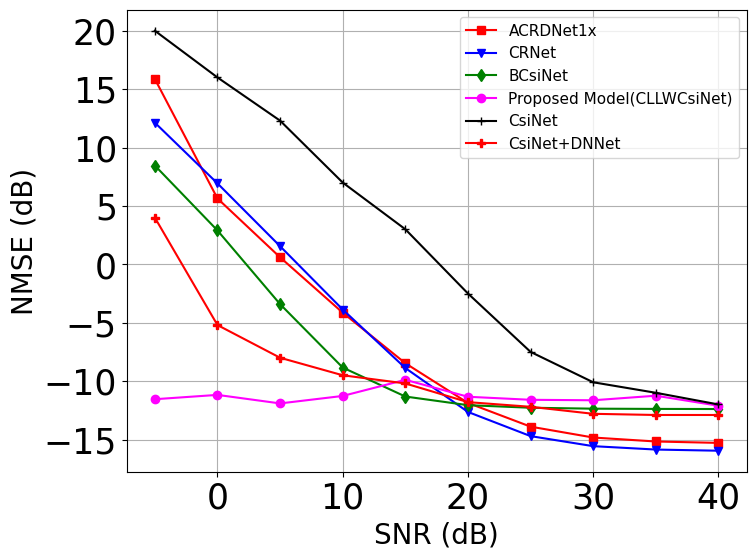

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Sample data
ypoints = np.array([15.87, 5.64, 0.60, -4.14, -8.47, -11.87, -13.90, -14.83, -15.17, -15.29])
ypoints1 = np.array([12.13, 6.93, 1.55, -3.87, -8.88, -12.64, -14.71, -15.57, -15.86, -15.96])
ypoints2 = np.array([8.46, 2.90, -3.41, -8.84, -11.32, -12.06, -12.28, -12.36, -12.38, -12.39])
ypoints3 = np.array([-11.55, -11.18, -11.91, -11.27, -9.89, -11.34, -11.60, -11.64, -11.25, -12.11])
ypoints4 = np.array([20, 16, 12.30, 7, 3, -2.5, -7.5, -10.10, -11, -12])
ypoints5 = np.array([4, -5.20, -8, -9.5, -10.2, -11.8, -12.2, -12.8, -12.9, -12.9])
xpoints = np.array([-5, 0, 5, 10, 15, 20, 25, 30, 35, 40])

# Calculate Pearson correlation coefficient between ypoints3 and ypoints
corr, _ = pearsonr(ypoints3, ypoints)

# Font properties
font_properties = {
    'family': 'sans-serif',
    'size': 11,
}

# Plotting the main figure
plt.figure(figsize=(8, 6))
plt.grid(True)

plt.plot(xpoints, ypoints, color='red', marker='s', label='ACRDNet1x' )
plt.plot(xpoints, ypoints1, color='blue', marker='v', label='CRNet' )
plt.plot(xpoints, ypoints2, color='green', marker='d', label='BCsiNet')
plt.plot(xpoints, ypoints3, color='magenta', marker='o', label='Proposed Model(CLLWCsiNet)')
plt.plot(xpoints, ypoints4, color='black', marker='+', label='CsiNet')
plt.plot(xpoints, ypoints5, color='red', marker='P', label='CsiNet+DNNet')

plt.xlabel('SNR (dB)', fontsize=20)
plt.ylabel('NMSE (dB)', fontsize=20)
plt.xticks(fontsize=25)  # Set font size for x-axis tick labels
plt.yticks(fontsize=25)  # Set font size for y-axis tick labels
plt.legend(loc='upper right', prop=font_properties)

# Save the plot as an image file (optional)
plt.savefig('nmse_vs_noise_ieee.png', dpi=300, bbox_inches='tight')

# Display the main plot
plt.show()




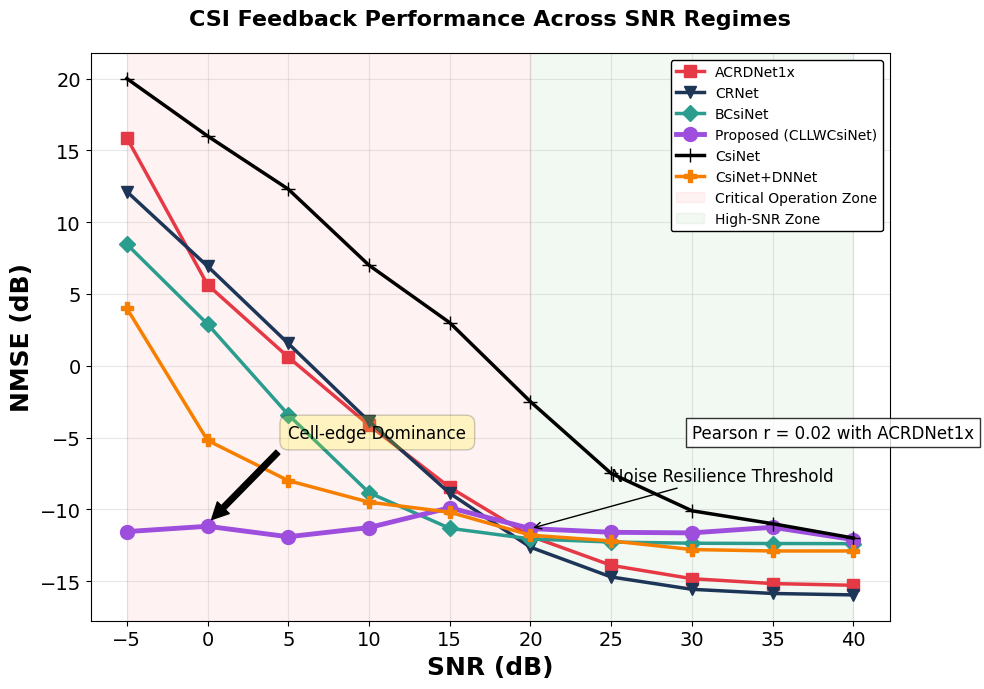

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Data preparation
ypoints = np.array([15.87, 5.64, 0.60, -4.14, -8.47, -11.87, -13.90, -14.83, -15.17, -15.29])  # ACRDNet1x
ypoints1 = np.array([12.13, 6.93, 1.55, -3.87, -8.88, -12.64, -14.71, -15.57, -15.86, -15.96])  # CRNet
ypoints2 = np.array([8.46, 2.90, -3.41, -8.84, -11.32, -12.06, -12.28, -12.36, -12.38, -12.39])  # BCsiNet
ypoints3 = np.array([-11.55, -11.18, -11.91, -11.27, -9.89, -11.34, -11.60, -11.64, -11.25, -12.11])  # Proposed Model
ypoints4 = np.array([20, 16, 12.30, 7, 3, -2.5, -7.5, -10.10, -11, -12])  # CsiNet
ypoints5 = np.array([4, -5.20, -8, -9.5, -10.2, -11.8, -12.2, -12.8, -12.9, -12.9])  # CsiNet+DNNet
xpoints = np.array([-5, 0, 5, 10, 15, 20, 25, 30, 35, 40])  # SNR values

# Calculate correlation
corr, _ = pearsonr(ypoints3, ypoints)

# Plot configuration
plt.figure(figsize=(10, 7))
plt.grid(True, alpha=0.3)

# Plot lines with enhanced visual distinction
line_plots = [
    plt.plot(xpoints, ypoints, color='#E63946', marker='s', markersize=8, linewidth=2.5, label='ACRDNet1x')[0],
    plt.plot(xpoints, ypoints1, color='#1D3557', marker='v', markersize=8, linewidth=2.5, label='CRNet')[0],
    plt.plot(xpoints, ypoints2, color='#2A9D8F', marker='D', markersize=8, linewidth=2.5, label='BCsiNet')[0],
    plt.plot(xpoints, ypoints3, color='#9D4EDD', marker='o', markersize=10, linewidth=3.5, label='Proposed (CLLWCsiNet)')[0],
    plt.plot(xpoints, ypoints4, color='#000000', marker='+', markersize=10, linewidth=2.5, label='CsiNet')[0],
    plt.plot(xpoints, ypoints5, color='#F77F00', marker='P', markersize=8, linewidth=2.5, label='CsiNet+DNNet')[0]
]

# Annotations for key findings
plt.annotate('Cell-edge Dominance', xy=(0, -11), xytext=(5, -5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.2))

plt.annotate('Noise Resilience Threshold', xy=(20, -11.34), xytext=(25, -8),
             arrowprops=dict(arrowstyle='->'),
             fontsize=12)

# SNR region highlighting
plt.axvspan(-5, 20, color='red', alpha=0.05, label='Critical Operation Zone')
plt.axvspan(20, 40, color='green', alpha=0.05, label='High-SNR Zone')

# Axis and labels
plt.xlabel('SNR (dB)', fontsize=18, fontweight='bold')
plt.ylabel('NMSE (dB)', fontsize=18, fontweight='bold')
plt.xticks(xpoints, fontsize=14)
plt.yticks(fontsize=14)

# Legend and title
# legend = plt.legend(loc='upper right', bbox_to_anchor=(0.02, 0.02),
#                     framealpha=1, frameon=True, shadow=True,
#                     borderpad=1, prop={'size': 12})


legend = plt.legend(loc='upper right', bbox_to_anchor=(1, 1),
                    frameon=True, framealpha=1, edgecolor='black',
                    fontsize=10, handlelength=2)


plt.title('CSI Feedback Performance Across SNR Regimes',
          fontsize=16, pad=20, fontweight='bold')

# Correlation annotation
plt.text(30, -5, f'Pearson r = {corr:.2f} with ACRDNet1x',
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Final polish
plt.tight_layout()
plt.savefig('nmse_vs_snr_enhanced.png', dpi=350, bbox_inches='tight')
plt.show()

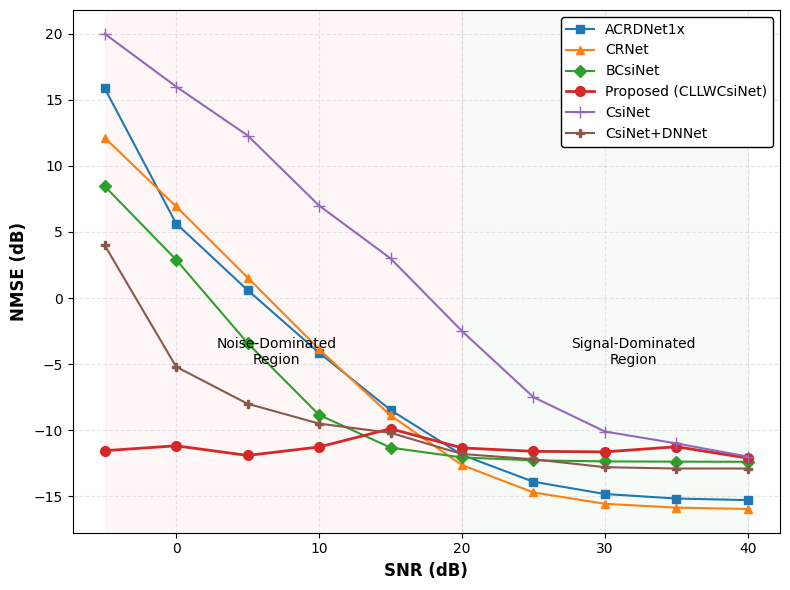

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Data preparation
ypoints = np.array([15.87, 5.64, 0.60, -4.14, -8.47, -11.87, -13.90, -14.83, -15.17, -15.29])  # ACRDNet1x
ypoints1 = np.array([12.13, 6.93, 1.55, -3.87, -8.88, -12.64, -14.71, -15.57, -15.86, -15.96])  # CRNet
ypoints2 = np.array([8.46, 2.90, -3.41, -8.84, -11.32, -12.06, -12.28, -12.36, -12.38, -12.39])  # BCsiNet
ypoints3 = np.array([-11.55, -11.18, -11.91, -11.27, -9.89, -11.34, -11.60, -11.64, -11.25, -12.11])  # Proposed Model
ypoints4 = np.array([20, 16, 12.30, 7, 3, -2.5, -7.5, -10.10, -11, -12])  # CsiNet
ypoints5 = np.array([4, -5.20, -8, -9.5, -10.2, -11.8, -12.2, -12.8, -12.9, -12.9])  # CsiNet+DNNet
xpoints = np.array([-5, 0, 5, 10, 15, 20, 25, 30, 35, 40])  # SNR values

# Plot configuration
plt.figure(figsize=(8, 6))
plt.grid(True, alpha=0.3, linestyle='--')

# Plot lines with IEEE-style formatting
line_props = [
    {'color': '#1f77b4', 'marker': 's', 'markersize': 6, 'linewidth': 1.5},  # ACRDNet1x
    {'color': '#ff7f0e', 'marker': '^', 'markersize': 6, 'linewidth': 1.5},  # CRNet
    {'color': '#2ca02c', 'marker': 'D', 'markersize': 6, 'linewidth': 1.5},  # BCsiNet
    {'color': '#d62728', 'marker': 'o', 'markersize': 7, 'linewidth': 2.0},  # Proposed
    {'color': '#9467bd', 'marker': '+', 'markersize': 8, 'linewidth': 1.5},  # CsiNet
    {'color': '#8c564b', 'marker': 'P', 'markersize': 6, 'linewidth': 1.5}   # CsiNet+DNNet
]

labels = ['ACRDNet1x', 'CRNet', 'BCsiNet', 'Proposed (CLLWCsiNet)', 'CsiNet', 'CsiNet+DNNet']
for i, (y, props) in enumerate(zip([ypoints, ypoints1, ypoints2, ypoints3, ypoints4, ypoints5], line_props)):
    plt.plot(xpoints, y, **props, label=labels[i])

# SNR region highlighting (semi-transparent)
plt.axvspan(-5, 20, color='red', alpha=0.03)
plt.axvspan(20, 40, color='green', alpha=0.03)

# Critical points annotation
plt.annotate('Noise-Dominated\nRegion', xy=(7, -5), fontsize=10, ha='center')
plt.annotate('Signal-Dominated\nRegion', xy=(32, -5), fontsize=10, ha='center')

# Axis labels with proper units
plt.xlabel('SNR (dB)', fontsize=12, fontweight='bold')
plt.ylabel('NMSE (dB)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Legend in upper right with IEEE-style frame
legend = plt.legend(loc='upper right', bbox_to_anchor=(1, 1),
                    frameon=True, framealpha=1, edgecolor='black',
                    fontsize=10, handlelength=2)

# Final adjustments
plt.tight_layout()
plt.savefig('nmse_vs_snr_ieee.png', dpi=300, bbox_inches='tight')
plt.show()